In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import matplotlib.lines as mlines
from scipy.interpolate import UnivariateSpline
from tqdm import tqdm
import pickle
import numpy as np

import crflux.models as pm
import mceq_underground_helpers_cs as mh

In [14]:
plot_dir = '/hetghome/khymon/Plots/cs-analysis/'

In [8]:
cs = [0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5]

In [2]:
# Load the pickle file
with open("/hetghome/khymon/cs-files/R_value_const_pi-air_sibyll23c.pkl", "rb") as file:
    data = pickle.load(file)

# Print or inspect the data
print(data)


{('1.5', '0.5', '2212', 'jan'): np.float64(0.554708806997937), ('1.5', '0.5', '2212', 'apr'): np.float64(0.598586064763954), ('1.5', '0.5', '2212', 'jul'): np.float64(0.6440480810539082), ('1.5', '0.5', '5626', 'jan'): np.float64(1.0842257432256714), ('1.5', '0.5', '5626', 'apr'): np.float64(0.9717420311765563), ('1.5', '0.5', '5626', 'jul'): np.float64(0.8041759848023609), ('1.5', '0.6', '2212', 'jan'): np.float64(0.6489024879500835), ('1.5', '0.6', '2212', 'apr'): np.float64(0.6993873057774547), ('1.5', '0.6', '2212', 'jul'): np.float64(0.7463056945745244), ('1.5', '0.6', '5626', 'jan'): np.float64(1.0928761653486003), ('1.5', '0.6', '5626', 'apr'): np.float64(0.98165787465066), ('1.5', '0.6', '5626', 'jul'): np.float64(0.813472520109775), ('1.5', '0.7', '2212', 'jan'): np.float64(0.7313774054841335), ('1.5', '0.7', '2212', 'apr'): np.float64(0.786985533354694), ('1.5', '0.7', '2212', 'jul'): np.float64(0.837847385407354), ('1.5', '0.7', '5626', 'jan'): np.float64(1.1009540438780958)

In [22]:
def get_data(fixed_params):
    values = sorted({key[1] for key in data.keys() if key[0] == fixed_params[0] and key[2] == fixed_params[1] and key[3] == fixed_params[2]})

    # Collect data for each cs
    sel_data = [data[(fixed_params[0], cs, fixed_params[1], fixed_params[2])] for cs in values]

    return sel_data

In [34]:
data_d15_p_apr = get_data(("1.5", "2212", "apr"))
data_d35_p_apr = get_data(("3.5", "2212", "apr"))

data_d15_fe_apr = get_data(("1.5", "5626", "apr"))
data_d35_fe_apr = get_data(("3.5", "5626", "apr"))

data_d15_p_jan = get_data(("1.5", "2212", "jan"))
data_d35_p_jan = get_data(("3.5", "2212", "jan"))

data_d15_p_jul = get_data(("1.5", "2212", "jul"))
data_d35_p_jul = get_data(("3.5", "2212", "jul"))

data_d15_fe_jan = get_data(("1.5", "5626", "jan"))
data_d35_fe_jan= get_data(("3.5", "5626", "jan"))

data_d15_fe_jul = get_data(("1.5", "5626", "jul"))
data_d35_fe_jul = get_data(("3.5", "5626", "jul"))






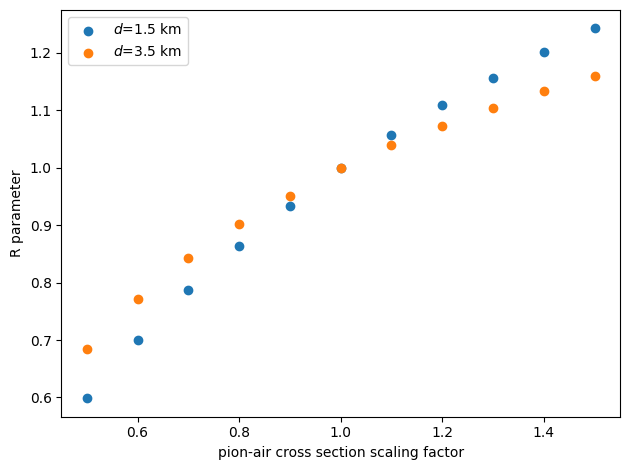

In [24]:
plt.figure()
plt.scatter(cs, data_d15_p_apr,label='$d$=1.5 km')
plt.scatter(cs, data_d35_p_apr,label ='$d$=3.5 km')
plt.xlabel('pion-air cross section scaling factor')
plt.ylabel('R parameter')
plt.legend()
plt.tight_layout()
plt.savefig(plot_dir + 'R_depth_p.png' )



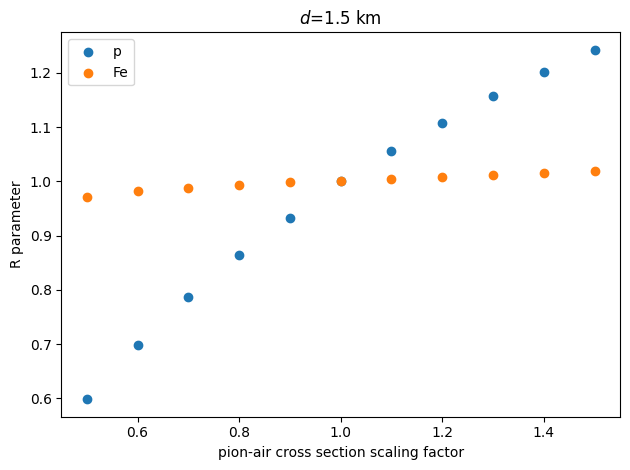

In [28]:
plt.figure()
plt.scatter(cs, data_d15_p_apr,label='p')
plt.scatter(cs, data_d15_fe_apr,label ='Fe')
plt.xlabel('pion-air cross section scaling factor')
plt.ylabel('R parameter')
plt.title('$d$=1.5 km')
plt.legend()
plt.tight_layout()
plt.savefig(plot_dir + 'R_depth1.5_nucleus.png' )


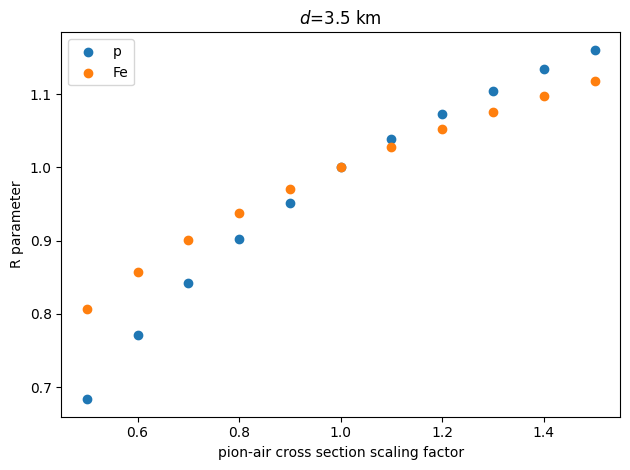

In [29]:
plt.figure()
plt.scatter(cs, data_d35_p_apr,label='p')
plt.scatter(cs, data_d35_fe_apr,label ='Fe')
plt.xlabel('pion-air cross section scaling factor')
plt.ylabel('R parameter')
plt.title('$d$=3.5 km')
plt.legend()
plt.tight_layout()
plt.savefig(plot_dir + 'R_depth3.5_nucleus.png' )

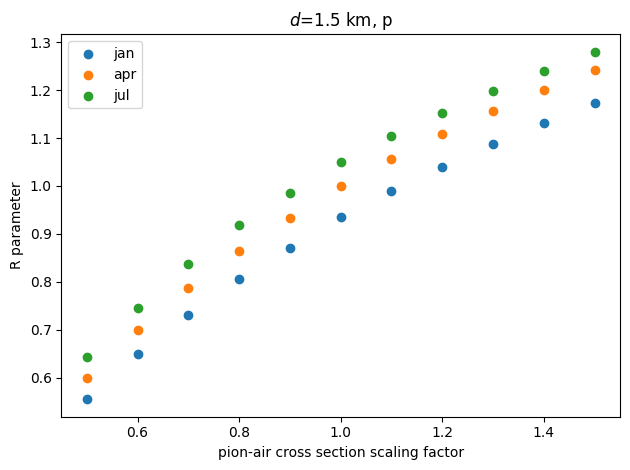

In [32]:
plt.figure()
plt.scatter(cs, data_d15_p_jan,label='jan')
plt.scatter(cs, data_d15_p_apr,label ='apr')
plt.scatter(cs, data_d15_p_jul,label ='jul')
plt.xlabel('pion-air cross section scaling factor')
plt.ylabel('R parameter')
plt.title('$d$=1.5 km, p')
plt.legend()
plt.tight_layout()
plt.savefig(plot_dir + 'R_depth1.5_p_season.png' )


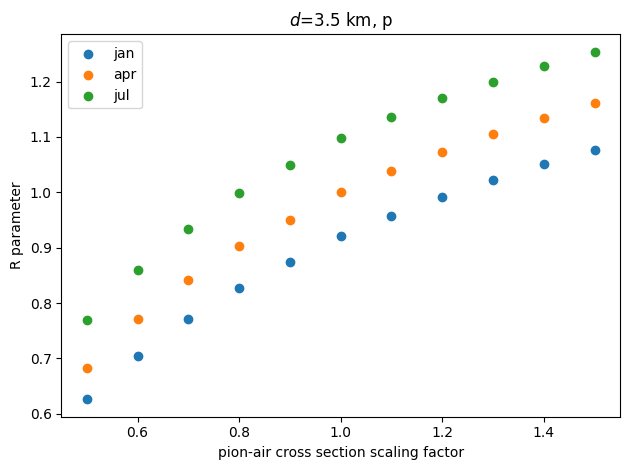

In [33]:
plt.figure()
plt.scatter(cs, data_d35_p_jan,label='jan')
plt.scatter(cs, data_d35_p_apr,label ='apr')
plt.scatter(cs, data_d35_p_jul,label ='jul')
plt.xlabel('pion-air cross section scaling factor')
plt.ylabel('R parameter')
plt.title('$d$=3.5 km, p')
plt.legend()
plt.tight_layout()
plt.savefig(plot_dir + 'R_depth3.5_p_season.png' )

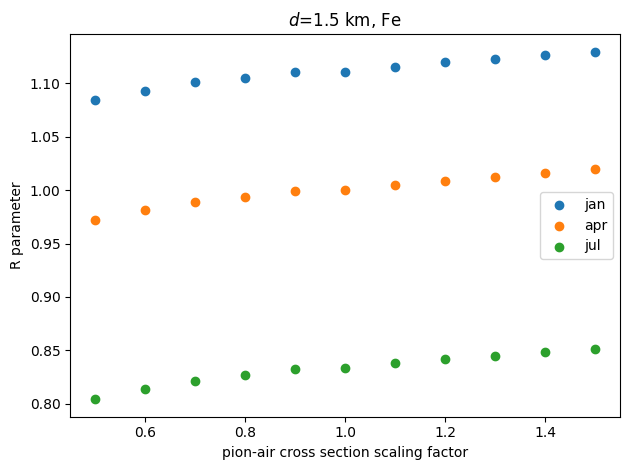

In [35]:
plt.figure()
plt.scatter(cs, data_d15_fe_jan,label='jan')
plt.scatter(cs, data_d15_fe_apr,label ='apr')
plt.scatter(cs, data_d15_fe_jul,label ='jul')
plt.xlabel('pion-air cross section scaling factor')
plt.ylabel('R parameter')
plt.title('$d$=1.5 km, Fe')
plt.legend()
plt.tight_layout()
plt.savefig(plot_dir + 'R_depth1.5_fe_season.png' )

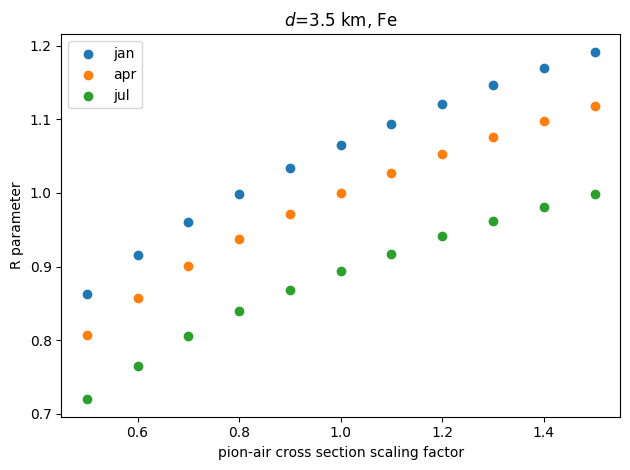

In [36]:
plt.figure()
plt.scatter(cs, data_d35_fe_jan,label='jan')
plt.scatter(cs, data_d35_fe_apr,label ='apr')
plt.scatter(cs, data_d35_fe_jul,label ='jul')
plt.xlabel('pion-air cross section scaling factor')
plt.ylabel('R parameter')
plt.title('$d$=3.5 km, Fe')
plt.legend()
plt.tight_layout()
plt.savefig(plot_dir + 'R_depth3.5_fe_season.png' )